In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import math
from pandas import DataFrame

In [2]:
pts = []
with open(r"C:\Users\Dima\Desktop\uni\5th sem\machine learning\ass3\Data.txt") as file:
    for readline in file:
        line_strip = readline.strip() # removing \n
        point = line_strip.split() # removing \t
        pts.append(point)
data = np.array(pts)       
data = data.astype(float) #change from string to float

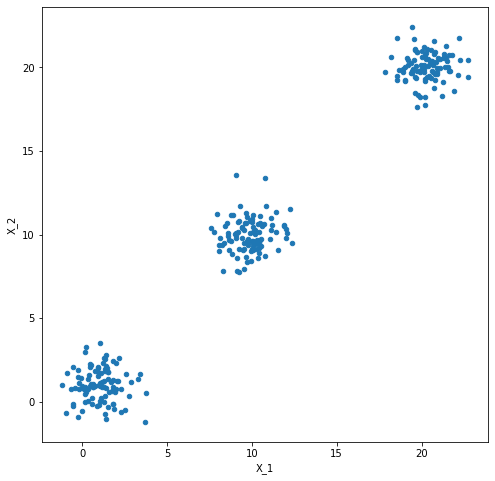

In [3]:
df = DataFrame(dict(x=data[:,0], y=data[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [4]:
c1=np.random.choice(len(data), size=100, replace=False)
c1= c1.astype(int)

In [5]:
def getDistance(p1,p2) :  
    return math.sqrt(((p2[0]-p1[0])**2)+((p2[1]-p1[1])**2))

In [6]:
def MaxDistance(c1,data) :
    Max = 0
    MaxIndex = 0
    for i in range(len(data)) :
        if(getDistance(data[i],data[c1]) >= Max ):
            MaxIndex = i
            Max = getDistance(data[i],data[c1])
    return MaxIndex

In [7]:
##return an array of 100 mean each index has a mean for a certain class
def getCenters(c1,data) :
    centers = np.zeros((1,3))
    centers=centers.astype(int)
    for i in range(len(c1)) :
        if(i == 0):
#             print(centers[0][0])    
            centers[0][0] = c1[0]
            centers[0][1] = MaxDistance(c1[0],data)
            centers[0][2] = MaxDistance(centers[0][1],data)
        else:
            c2 = MaxDistance(c1[i],data)
            c3 = MaxDistance(c2,data)
            centers = np.append(centers,[[c1[i],c2,c3]],axis = 0)
    return centers
           
    #print(centers)
#getCenters(c1,data)

In [8]:
centers=getCenters(c1,data)

In [9]:
def mind(data,center,pt):
    for i in range (len(center)):
        mind = getDistance(center[0], pt)
        cluster=0
        
        if(getDistance(center[1], pt)< mind) :
            mind = getDistance(center[1],pt)
            cluster = 1
        elif(getDistance(center[2], pt)< mind):
            mind = getDistance(center[2],pt)
            cluster = 2
        return cluster


In [10]:
def updateClusters(data,centers,length) :
    cluster_0 = np.array([])
    cluster_1 = np.array([])
    cluster_2 = np.array([])
    
#     res = 0
    for i in range(length):
        res = mind(data,centers,data[i])
        if(res == 0):
            cluster_0 = np.append(cluster_0, [i])
        elif(res == 1):
            cluster_1 = np.append(cluster_1, [i])
        else:
            cluster_2 = np.append(cluster_2, [i])     
    clusters= np.array([cluster_0,cluster_1,cluster_2],dtype=object)
#     print("cluster0",cluster_0)
#     print("cluster1",cluster_1)
#     print("cluster2",cluster_2)
    return clusters
#updateClusters(data,centers)  

In [15]:
def updateMean(data,centers,q):
    
    mean = np.array([data[centers[q][0]],data[centers[q][1]],data[centers[q][2]]])
    for k in range(1000) :
        
        clusters = updateClusters(data,mean,len(data))
        flag = False
        for i in range(3):
            sumX = 0
            sumY = 0
            if(len(clusters[i])==0):
                continue
            for j in range(len(clusters[i])):
                sumX += data[ int(clusters[i][j])][0]
                sumY += data[ int(clusters[i][j])][1]
            average = np.array([sumX/len(clusters[i]) , sumY/len(clusters[i])] )
            if(np.array_equal(average, mean[i])):
                flag = True
            else:
                flag = False
            mean[i] = average #update center-mean with average
    
        if(flag):
            return mean
#     print(k)    
    return mean


In [16]:
def avgdist(mean,data,clusters):
    sumd=0
    for i in range (3):
        for j in range (len(clusters[i])):
            sumd+=getDistance(mean[i],data[int(clusters[i][j])])
    avg=sumd/len(data)
    return avg

In [22]:
def bestmean(data,centers,size):
    minmean=updateMean(data,centers,0)
    clusters=updateClusters(data,minmean,len(data))
    minavg= avgdist(minmean,data,clusters)
    for i in range(1,size):
        currentmean=updateMean(data,centers,i)
        currentclusters=updateClusters(data,currentmean,len(data))
        currentavg=avgdist(currentmean,data,currentclusters)
        if(currentavg<minavg):
            minavg=currentavg
            minmean=currentmean
    return minmean

In [23]:
mean=bestmean(data,centers,len(c1))
clusters1=updateClusters(data,mean,len(data))

In [24]:
c_1 = 0
c_0 = 100
c_2 = 200

cluster0,cluster1,cluster2 = [] , [] , []

while c_0 < 200 :
    cluster0.append(data[c_0])
    c_0 = c_0 +1 
    
while c_1 < 100 :
    cluster1.append(data[c_1])
    c_1 = c_1 +1  
    
while c_2 < 300 :
    cluster2.append(data[c_2])
    c_2 = c_2 +1

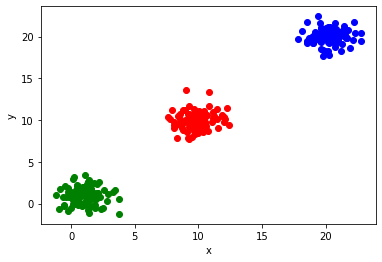

In [25]:
for i in range(len(cluster0)):
    plt.scatter(x = cluster0[i][0], y = cluster0[i][1], color = 'red')
    plt.scatter(x = cluster1[i][0], y = cluster1[i][1], color = 'blue')
    plt.scatter(x = cluster2[i][0], y = cluster2[i][1], color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()   

In [26]:
pts = []
with open(r'C:\Users\Dima\Desktop\uni\5th sem\machine learning\ass3\Data2.txt') as file:
    for readline in file:
        line_strip = readline.strip() # removing \n
        point = line_strip.split() # removing \t
        pts.append(point)
data2 = np.array(pts)       
data2 = data2.astype(float) #change from string to float

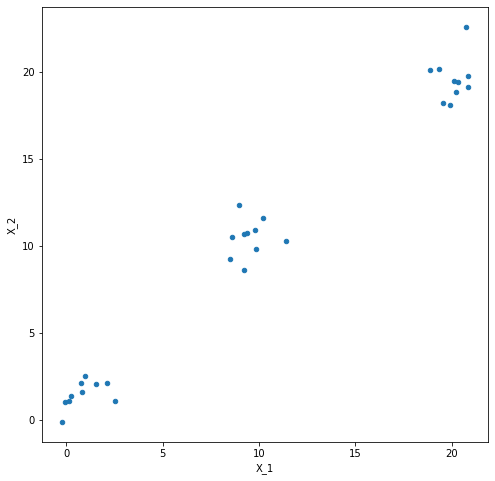

In [86]:
df2 = DataFrame(dict(x=data2[:,0], y=data2[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df2.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [27]:
c2 = np.random.choice(len(data2), size = 30, replace = False)
c2 = c2.astype(int)

In [29]:
center_2 = getCenters(c2,data2)
mean2 = bestmean(data2,center_2,30)
cluster_2 = updateClusters(data2,mean2,len(data2))

In [30]:
c_1 = 0
c_0 = 10
c_2 = 20

cluster0,cluster1,cluster2 = [] , [] , []

while c_0 < 20 :
    cluster0.append(data2[c_0])
    c_0 = c_0 +1 
    
while c_1 < 10 :
    cluster1.append(data2[c_1])
    c_1 = c_1 +1  
    
while c_2 < 30 :
    cluster2.append(data2[c_2])
    c_2 = c_2 +1

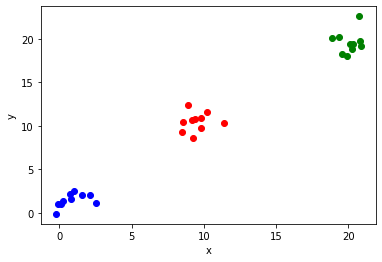

In [31]:
for i in range(len(cluster0)):
    plt.scatter(x = cluster0[i][0], y = cluster0[i][1], color = 'red')
    plt.scatter(x = cluster1[i][0], y = cluster1[i][1], color = 'blue')
    plt.scatter(x = cluster2[i][0], y = cluster2[i][1], color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()   